In [1]:
# by, Team - D

# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [94]:
df = pd.read_csv('data.csv')

In [95]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [96]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [97]:
df.shape

(1453, 15)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


#### -No Null values in data

In [99]:
df = df.replace({'Yes':1, 'No':0}) 

# changing yes --> 1, and 
#             no --> 0s

In [100]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


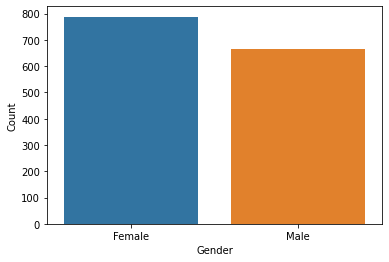

In [101]:
sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

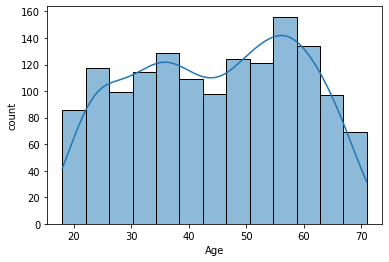

In [102]:
sns.histplot(df['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [103]:
print(df['Like'].unique())
df['Like'] = df['Like'].replace({'I hate it!-5':'-5', 'I love it!+5':'+5'}).astype(int)

['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']


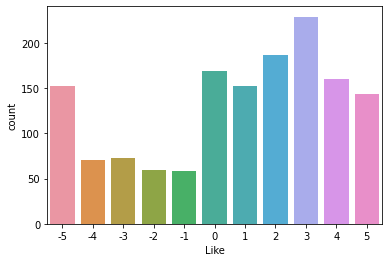

In [114]:
sns.countplot(df['Like'])
plt.show()

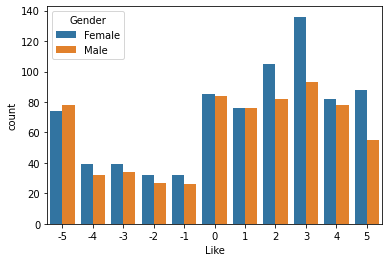

In [115]:
sns.countplot(df['Like'], hue=df['Gender'])
plt.show()

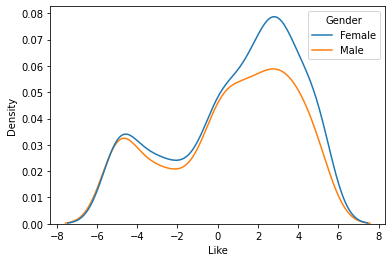

In [105]:
sns.kdeplot(df['Like'], hue=df['Gender'])
plt.show()

## Selecting features

In [106]:
var = df.iloc[:, 0:11]

In [107]:
var.sample(4)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
17,1,1,0,0,1,1,0,1,0,0,0
1320,0,1,0,1,1,1,0,0,1,0,1
270,0,1,0,1,1,1,1,1,0,0,1
811,1,0,0,0,1,1,0,1,1,0,0


In [108]:
var.describe().loc['mean'].round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
Name: mean, dtype: float64

## Using Kmeans

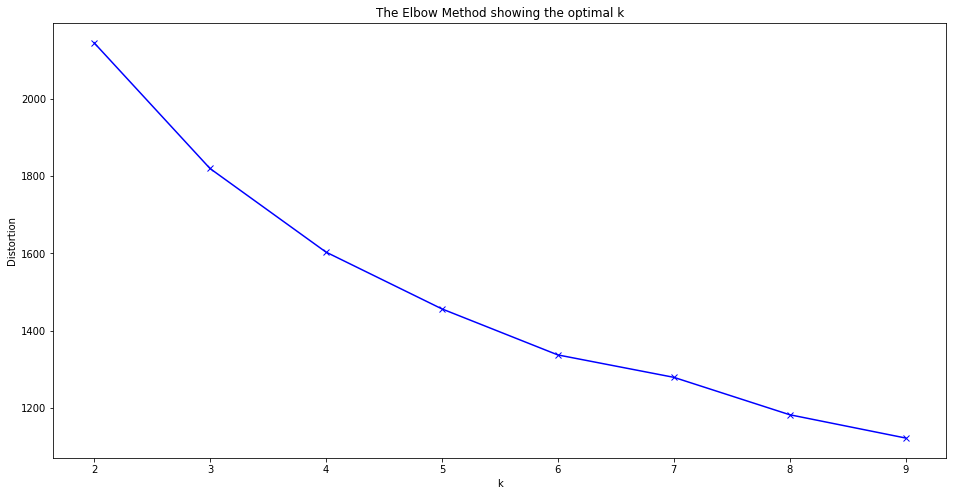

In [109]:
from sklearn.cluster import KMeans

distortions = []
K = range(2,10)
for i in K:
    kmeans_obj = KMeans(n_clusters=i)
    kmeans_obj.fit(var)
    distortions.append(kmeans_obj.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### The elbow curve shows inertia of clustering with respect to no. of centroids. As we increase number of centroid, inertia drops. So we need to select the optimum no. of centroids.
### optimum number of clusters should be 4

## Hierarchical clustering

#### The dendogram represents the similarity among group of entities

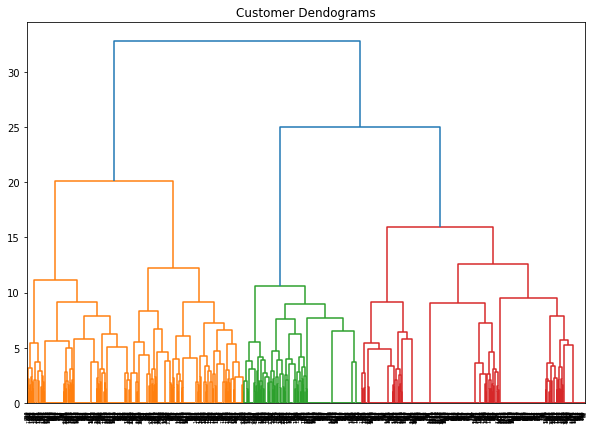

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

    
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = dendrogram(linkage(var, method='ward'))

#### Agglomerative clustering groups the objects based on their similarity

In [111]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit(var)

print(cluster.labels_)

[1 0 1 ... 2 0 1]
